In [6]:
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scanorama

/home/yzy/anaconda3/envs/scaden/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [20]:
sc.logging.print_versions()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 3
%matplotlib inline

scanpy==1.5.1 anndata==0.7.1 umap==0.3.10 numpy==1.16.2 scipy==1.4.1 pandas==1.0.5 scikit-learn==0.22.1 statsmodels==0.11.0 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0


In [8]:
adata_spatial_anterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Anterior"
)
adata_spatial_posterior = sc.datasets.visium_sge(
    sample_id="V1_Mouse_Brain_Sagittal_Posterior"
)


reading /home/yzy/projects/SEAM/SEAM/ipynbs/test/data/V1_Mouse_Brain_Sagittal_Anterior/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.



reading /home/yzy/projects/SEAM/SEAM/ipynbs/test/data/V1_Mouse_Brain_Sagittal_Posterior/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [9]:
adata_spatial_anterior

AnnData object with n_obs × n_vars = 2696 × 31053 
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [10]:
adata_spatial_anterior.var_names_make_unique()
adata_spatial_posterior.var_names_make_unique()
sc.pp.calculate_qc_metrics(adata_spatial_anterior, inplace=True)
sc.pp.calculate_qc_metrics(adata_spatial_posterior, inplace=True)

In [17]:
adata_spatial_anterior

AnnData object with n_obs × n_vars = 2696 × 31053 
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'spatial'
    obsm: 'spatial'

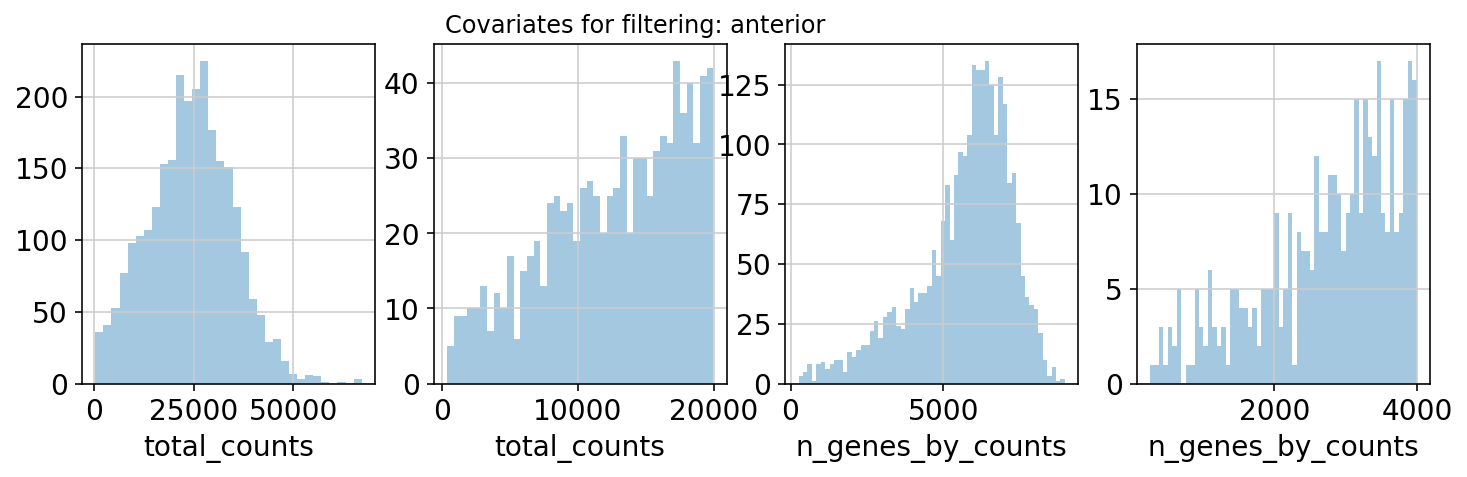

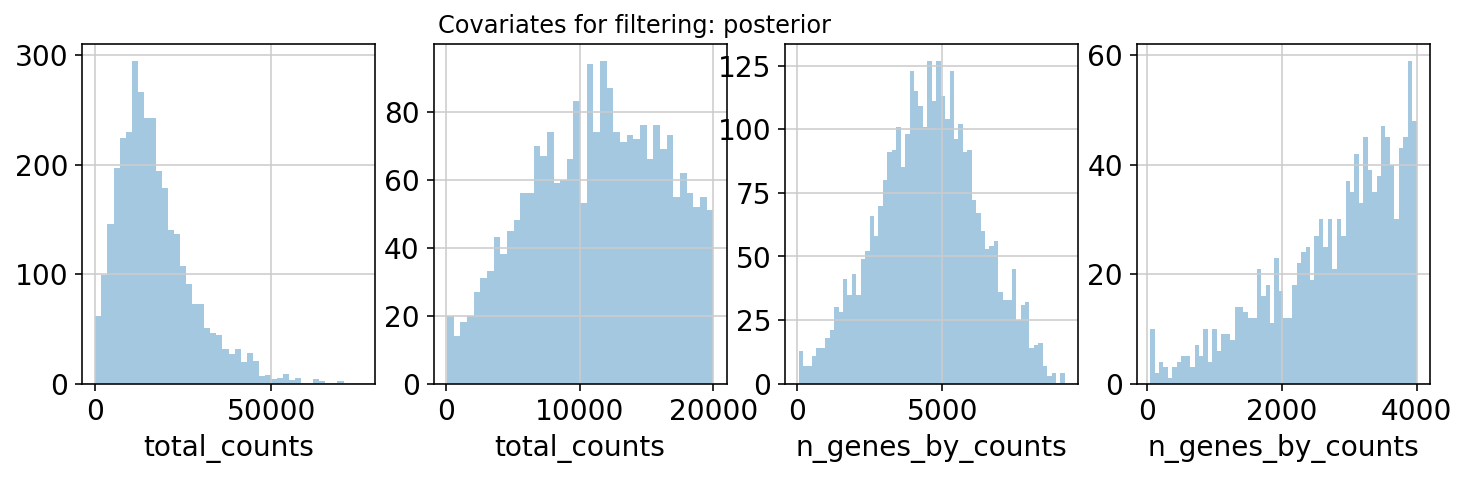

In [23]:
for name, adata in [
    ("anterior", adata_spatial_anterior),
    ("posterior", adata_spatial_posterior),
]:
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))
    fig.suptitle(f"Covariates for filtering: {name}")

    sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
    sns.distplot(
        adata.obs["total_counts"][adata.obs["total_counts"] < 20000],
        kde=False,
        bins=40,
        ax=axs[1],
    )
    sns.distplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
    sns.distplot(
        adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000],
        kde=False,
        bins=60,
        ax=axs[3],
    )
    

In [25]:
for adata in [
    adata_spatial_anterior,
    adata_spatial_posterior,
]:
    sc.pp.normalize_total(adata, inplace=True)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000, inplace=True)

normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [26]:
adatas = [adata_spatial_anterior, adata_spatial_posterior]
integrated, corrected = scanorama.correct_scanpy(adatas, return_dimred=True)

Found 31053 genes among all datasets
[[0.         0.48165822]
 [0.         0.        ]]
Processing datasets (0, 1)


In [36]:
integrated[0].shape

(2696, 100)

In [32]:
adata_spatial = adata_spatial_anterior.concatenate(
    adata_spatial_posterior,
    batch_key="library_id",
#     uns_merge="unique",
    batch_categories=[
        k
        for d in [
            adata_spatial_anterior.uns["spatial"],
            adata_spatial_posterior.uns["spatial"],
        ]
        for k, v in d.items()
    ],
)

In [33]:
adata_spatial

AnnData object with n_obs × n_vars = 6049 × 31053 
    obs: 'array_col', 'array_row', 'in_tissue', 'library_id', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'n_genes_by_counts', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'pct_counts_in_top_50_genes', 'total_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts-V1_Mouse_Brain_Sagittal_Anterior', 'mean_counts-V1_Mouse_Brain_Sagittal_Anterior', 'log1p_mean_counts-V1_Mouse_Brain_Sagittal_Anterior', 'pct_dropout_by_counts-V1_Mouse_Brain_Sagittal_Anterior', 'total_counts-V1_Mouse_Brain_Sagittal_Anterior', 'log1p_total_counts-V1_Mouse_Brain_Sagittal_Anterior', 'highly_variable-V1_Mouse_Brain_Sagittal_Anterior', 'means-V1_Mouse_Brain_Sagittal_Anterior', 'dispersions-V1_Mouse_Brain_Sagittal_Anterior', 'dispersions_norm-V1_Mouse_Brain_Sagittal_Anterior', 'n_cells_by_counts-V1_Mouse_Brain_Sagittal_Posterior', 'mean_counts-V1_Mouse_Brain_Sagittal_Posterior', 'log1p_mean_co